In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import statistics
from math import sqrt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

Задание №1.

In [122]:
dat = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]
ddf = pd.DataFrame(dat, columns=['weather', 'stroll'])
ddf

,weather,stroll
0,солнечно,True
1,снег,False
2,облачно,False
3,дождь,False
4,солнечно,True
5,снег,False
6,облачно,True
7,снег,False
8,солнечно,False
9,облачно,True


$P(yes|rain) =\frac{P(yes) \cdot P(rain | yes)}{P(rain)}$

In [123]:
p_rain_if_stroll = len(ddf.loc[(ddf['weather'] == 'дождь') & (ddf['stroll'] == True)]) / len(ddf.loc[ddf['stroll'] == True])

In [124]:
p_stroll_if_rain = ((len(ddf.loc[ddf['stroll'] == True]) / len(ddf))*p_rain_if_stroll)/(len(ddf.loc[ddf['weather'] == 'дождь']) / len(ddf))
p_stroll_if_rain

0.3333333333333333

Задание №2.

In [125]:
data= pd.read_csv('data\Dataset4.csv')

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62484 non-null  float64
 3   Humidity[%]     62383 non-null  float64
 4   TVOC[ppb]       62009 non-null  float64
 5   eCO2[ppm]       62305 non-null  float64
 6   Raw H2          62519 non-null  float64
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62603 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62313 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62378 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  object 
dtypes: float64(11), int64(4), object(1)
memory usage: 7.6+ MB


In [127]:
data.head(5)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0.0,400.0,12306.0,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,No
1,1,1654733332,20.015,56.67,0.0,400.0,12345.0,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,No
2,2,1654733333,20.029,55.96,0.0,400.0,12374.0,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,No
3,3,1654733334,20.044,55.28,0.0,400.0,12390.0,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,No
4,4,1654733335,20.059,54.69,0.0,400.0,12403.0,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,No


In [128]:
data.isna().sum()

Unnamed: 0          0
UTC                 0
Temperature[C]    146
Humidity[%]       247
TVOC[ppb]         621
eCO2[ppm]         325
Raw H2            111
Raw Ethanol         0
Pressure[hPa]      27
PM1.0               0
PM2.5             317
NC0.5               0
NC1.0             252
NC2.5               0
CNT                 0
Fire Alarm          0
dtype: int64

In [129]:
data.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
count,62630.000000,6.263000e+04,62484.000000,62383.000000,62009.000000,62305.000000,62519.000000,62630.000000,62603.000000,62630.000000,62313.000000,62630.000000,62378.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.972252,48.536969,1944.124030,670.574994,12942.383835,19754.257912,938.627644,100.594309,184.443467,491.463608,203.382660,80.049042,10511.386157
std,18079.868017,1.100025e+05,14.361206,8.868993,7819.668069,1909.675941,272.531480,609.513156,1.331169,922.524245,1976.590473,4265.661251,2214.719662,1083.383189,7597.870997
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,11.000500,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000
50%,31314.500000,1.654762e+09,20.130000,50.140000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.942000,0.044000,9336.000000
75%,46971.750000,1.654778e+09,25.410000,53.240000,1189.000000,438.000000,13108.000000,20078.000000,939.417000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000


In [130]:
data.duplicated().sum()

0

In [131]:
data['Temperature[C]']=data['Temperature[C]'].map(lambda x: np.random.uniform(-22, 49) if pd.isna(x) else x)
data['Temperature[C]']

0        20.000
1        20.015
2        20.029
3        20.044
4        20.059
          ...  
62625    18.438
62626    18.653
62627    18.867
62628    19.083
62629    19.299
Name: Temperature[C], Length: 62630, dtype: float64

In [132]:
data['Humidity[%]']=data['Humidity[%]'].map(lambda x: np.random.uniform(10, 75) if pd.isna(x) else x)
data['Humidity[%]']

0        57.36
1        56.67
2        55.96
3        55.28
4        54.69
         ...  
62625    15.79
62626    15.87
62627    15.84
62628    16.04
62629    16.52
Name: Humidity[%], Length: 62630, dtype: float64

In [133]:
data['TVOC[ppb]']=data['TVOC[ppb]'].map(lambda x: np.random.uniform(0, 2000) if pd.isna(x) else x)
data['TVOC[ppb]']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
         ...  
62625    625.0
62626    612.0
62627    627.0
62628    638.0
62629    643.0
Name: TVOC[ppb], Length: 62630, dtype: float64

In [134]:
data['eCO2[ppm]']=data['eCO2[ppm]'].map(lambda x: np.random.uniform(400, 10000) if pd.isna(x) else x)
data['eCO2[ppm]']

0        400.0
1        400.0
2        400.0
3        400.0
4        400.0
         ...  
62625    400.0
62626    400.0
62627    400.0
62628    400.0
62629    400.0
Name: eCO2[ppm], Length: 62630, dtype: float64

In [135]:
data['Raw H2']=data['Raw H2'].map(lambda x: np.random.uniform(10668, 13803) if pd.isna(x) else x)
data['Raw H2']

0        12306.0
1        12345.0
2        12374.0
3        12390.0
4        12403.0
          ...   
62625    13723.0
62626    13731.0
62627    13725.0
62628    13712.0
62629    13696.0
Name: Raw H2, Length: 62630, dtype: float64

In [136]:
data['Pressure[hPa]']=data['Pressure[hPa]'].map(lambda x: np.random.uniform(930, 939) if pd.isna(x) else x)
data['Pressure[hPa]']

0        939.735
1        939.744
2        939.738
3        939.736
4        939.744
          ...   
62625    936.670
62626    936.678
62627    936.687
62628    936.680
62629    936.676
Name: Pressure[hPa], Length: 62630, dtype: float64

In [137]:
data['PM2.5']=data['PM2.5'].map(lambda x: np.random.uniform(0, 45432) if pd.isna(x) else x)
data['PM2.5']

0        0.00
1        0.00
2        0.00
3        0.00
4        0.00
         ... 
62625    0.65
62626    0.63
62627    0.60
62628    0.59
62629    0.59
Name: PM2.5, Length: 62630, dtype: float64

In [138]:
data['NC1.0']=data['NC1.0'].map(lambda x: np.random.uniform(0, 51914) if pd.isna(x) else x)
data['NC1.0']

0        0.000
1        0.000
2        0.000
3        0.000
4        0.000
         ...  
62625    0.673
62626    0.652
62627    0.617
62628    0.611
62629    0.607
Name: NC1.0, Length: 62630, dtype: float64

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  float64
 5   eCO2[ppm]       62630 non-null  float64
 6   Raw H2          62630 non-null  float64
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  object 
dtypes: float64(11), int64(4), object(1)
memory usage: 7.6+ MB


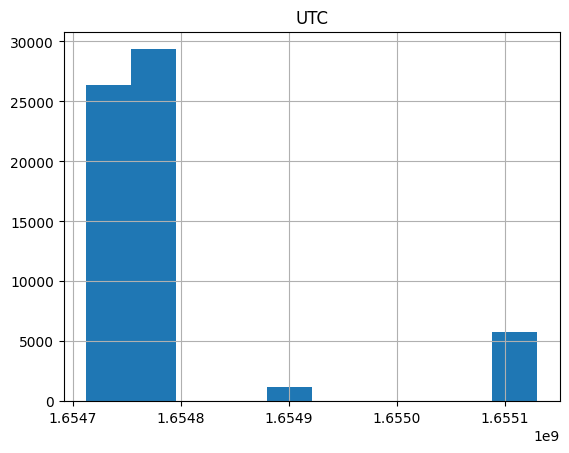

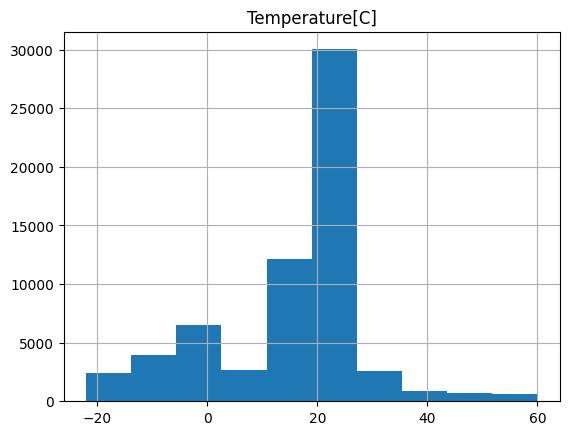

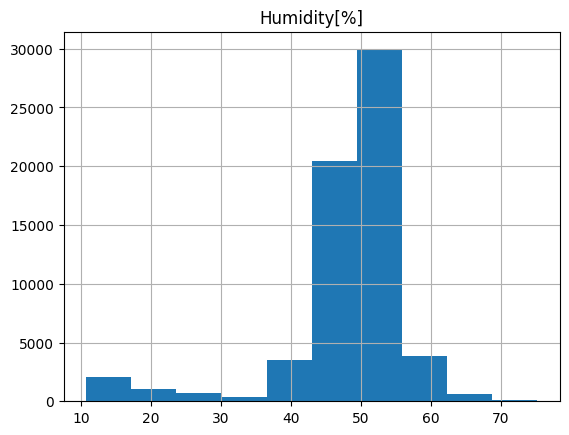

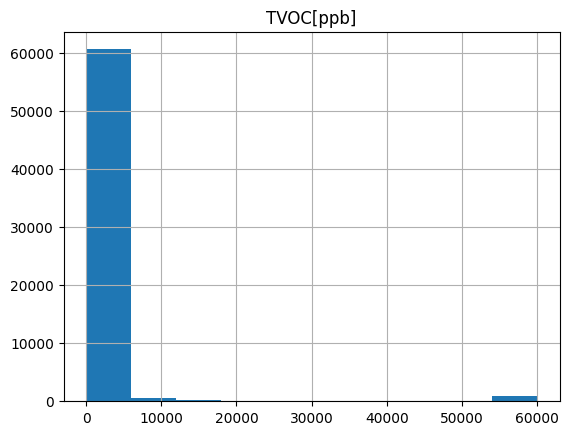

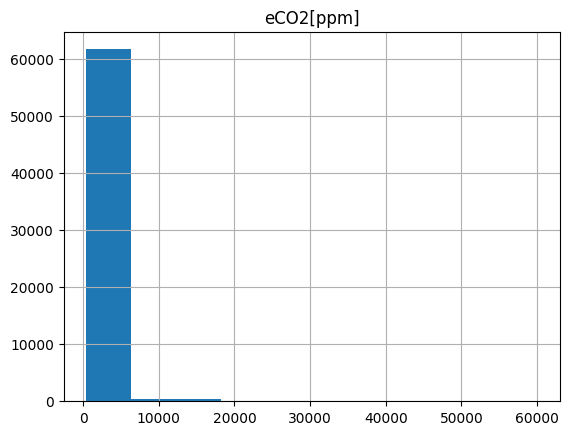

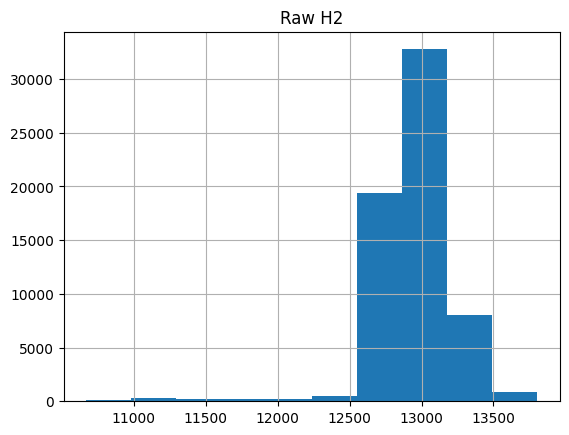

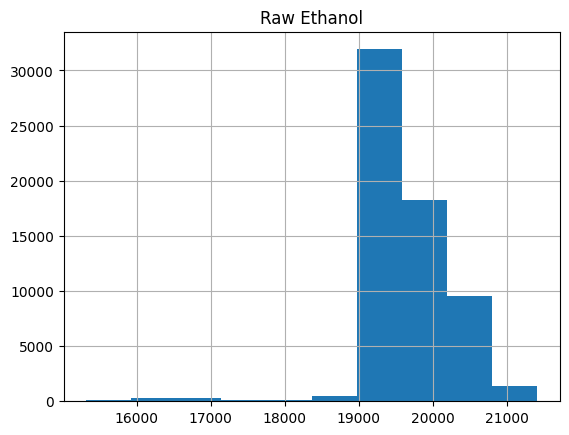

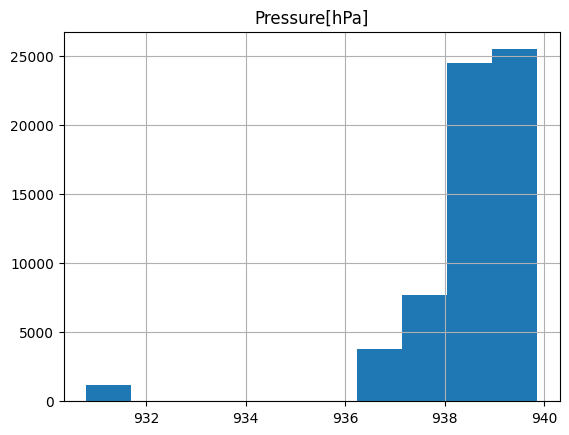

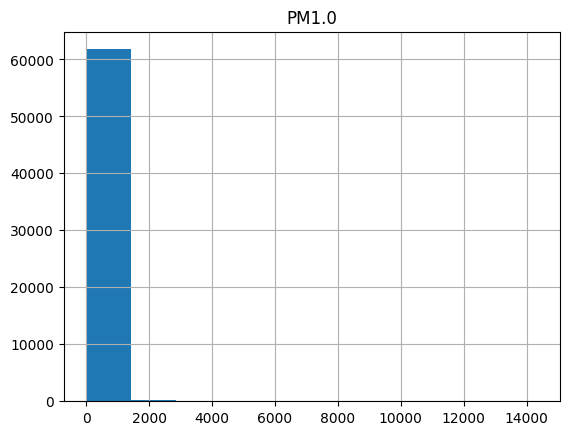

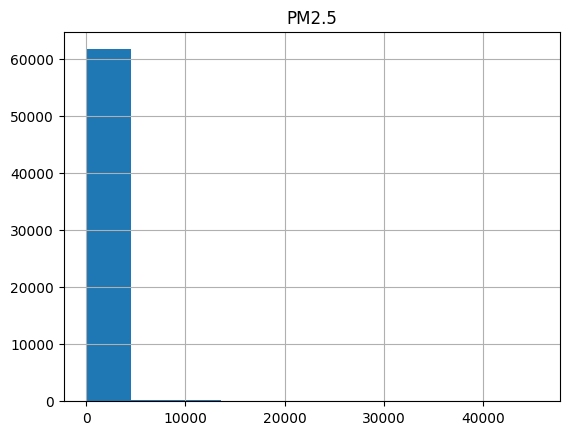

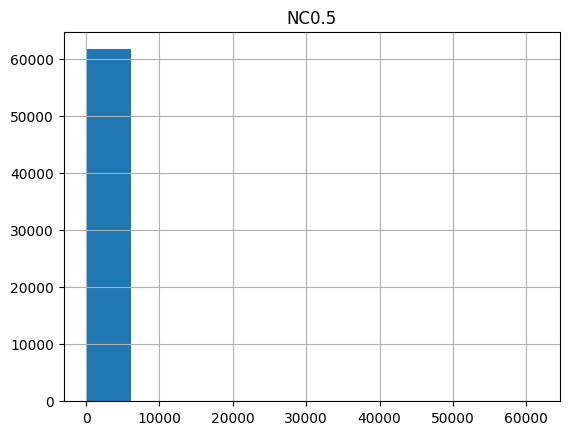

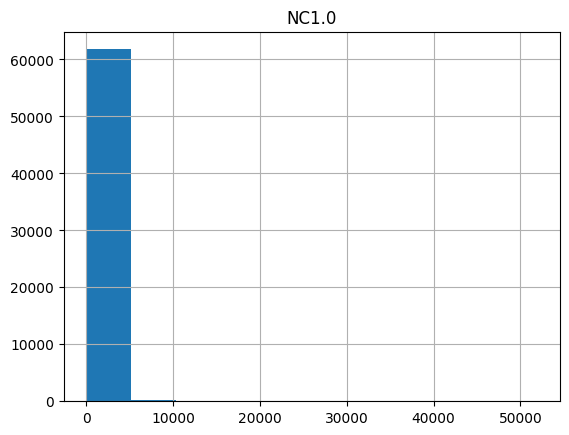

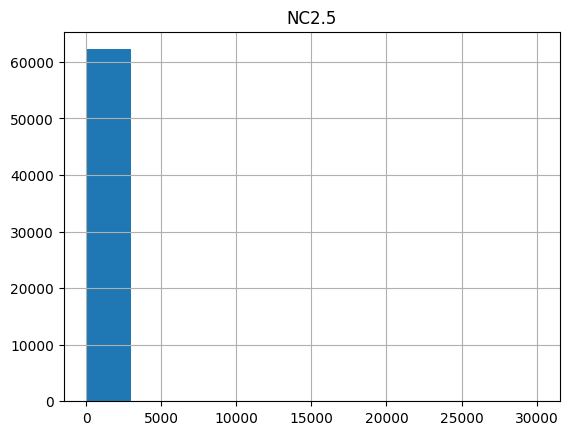

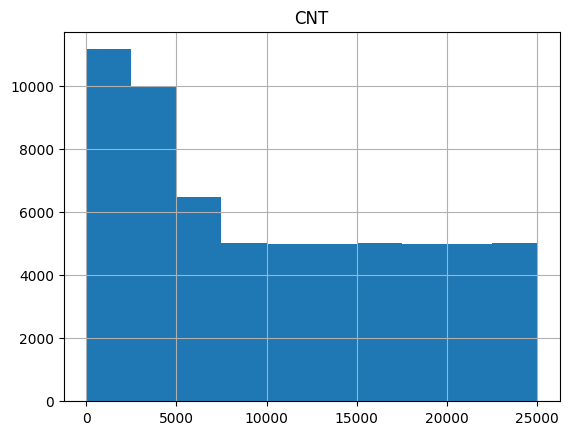

In [140]:
data.describe()[['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'CNT',]]
columns = ['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'CNT']

for column in columns:
    data.hist(column)

In [141]:
outlier = data[['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'CNT']]
outlier

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,1654733331,20.000,57.36,0.0,400.0,12306.0,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,1654733332,20.015,56.67,0.0,400.0,12345.0,18651,939.744,0.00,0.00,0.00,0.000,0.000,1
2,1654733333,20.029,55.96,0.0,400.0,12374.0,18764,939.738,0.00,0.00,0.00,0.000,0.000,2
3,1654733334,20.044,55.28,0.0,400.0,12390.0,18849,939.736,0.00,0.00,0.00,0.000,0.000,3
4,1654733335,20.059,54.69,0.0,400.0,12403.0,18921,939.744,0.00,0.00,0.00,0.000,0.000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625.0,400.0,13723.0,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739
62626,1655130048,18.653,15.87,612.0,400.0,13731.0,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740
62627,1655130049,18.867,15.84,627.0,400.0,13725.0,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741
62628,1655130050,19.083,16.04,638.0,400.0,13712.0,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742


In [142]:
Q1 = outlier.quantile(0.25)
Q1

UTC               1.654743e+09
Temperature[C]    1.093150e+01
Humidity[%]       4.752000e+01
TVOC[ppb]         1.310000e+02
eCO2[ppm]         4.000000e+02
Raw H2            1.283000e+04
Raw Ethanol       1.943500e+04
Pressure[hPa]     9.387000e+02
PM1.0             1.280000e+00
PM2.5             1.350000e+00
NC0.5             8.820000e+00
NC1.0             1.392000e+00
NC2.5             3.300000e-02
CNT               3.625250e+03
Name: 0.25, dtype: float64

In [143]:
Q3 = outlier.quantile(0.75)
Q3

UTC               1.654778e+09
Temperature[C]    2.541000e+01
Humidity[%]       5.324000e+01
TVOC[ppb]         1.189000e+03
eCO2[ppm]         4.390000e+02
Raw H2            1.310800e+04
Raw Ethanol       2.007800e+04
Pressure[hPa]     9.394170e+02
PM1.0             2.090000e+00
PM2.5             2.180000e+00
NC0.5             1.442000e+01
NC1.0             2.253000e+00
NC2.5             5.100000e-02
CNT               1.716475e+04
Name: 0.75, dtype: float64

In [144]:
IQR = Q3-Q1
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
240,1654733571,23.056,51.11,1.0,400.0,12626.0,19698,939.810,0.08,0.14,0.43,0.156,0.056,240
247,1654733578,23.131,50.08,5.0,400.0,12633.0,19696,939.813,0.09,0.17,0.46,0.189,0.074,247
248,1654733579,23.142,50.00,0.0,400.0,12629.0,19704,939.790,0.10,0.17,0.49,0.189,0.072,248
249,1654733580,23.153,49.85,12.0,400.0,12630.0,19698,939.791,0.10,0.18,0.50,0.195,0.074,249
250,1654733581,23.163,49.71,11.0,400.0,12637.0,19710,939.812,0.10,0.17,0.49,0.192,0.073,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49987,1654786336,25.190,49.55,1396.0,433.0,12969.0,19373,938.873,1.57,1.63,10.77,1.680,0.038,24993
51223,1654712268,26.840,44.99,17.0,415.0,12863.0,20774,937.630,2.18,2.26,15.00,2.340,0.053,81
51224,1654712269,26.810,45.00,27.0,426.0,12853.0,20763,937.634,2.18,2.26,15.00,2.339,0.053,82
51227,1654712272,28.910,42.89,31.0,415.0,12871.0,20756,937.625,2.15,2.24,14.81,2.310,0.052,85


In [145]:
index_list = list(data_filtered.index.values)
data_filtered = data[data.index.isin(index_list)]
data_filtered.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
240,240,1654733571,23.056,51.11,1.0,400.0,12626.0,19698,939.810,0.08,0.14,0.43,0.156,0.056,240,No
247,247,1654733578,23.131,50.08,5.0,400.0,12633.0,19696,939.813,0.09,0.17,0.46,0.189,0.074,247,No
248,248,1654733579,23.142,50.00,0.0,400.0,12629.0,19704,939.790,0.10,0.17,0.49,0.189,0.072,248,No
249,249,1654733580,23.153,49.85,12.0,400.0,12630.0,19698,939.791,0.10,0.18,0.50,0.195,0.074,249,No
250,250,1654733581,23.163,49.71,11.0,400.0,12637.0,19710,939.812,0.10,0.17,0.49,0.192,0.073,250,No


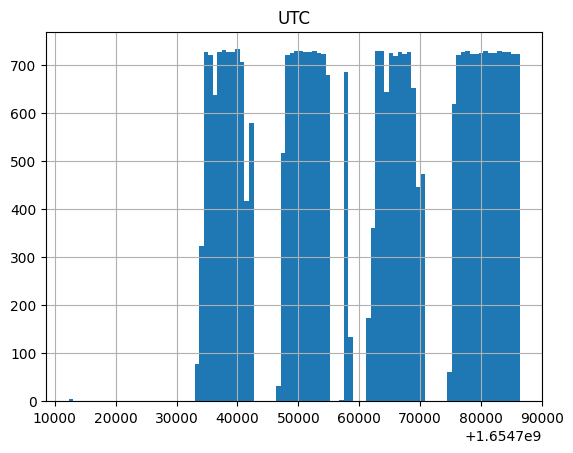

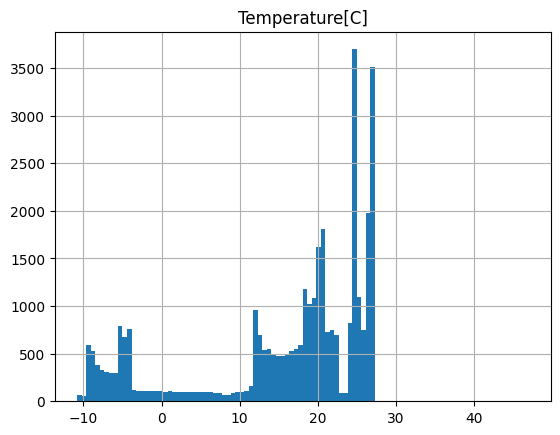

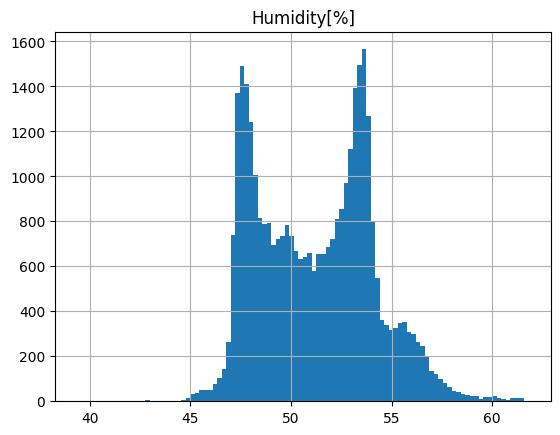

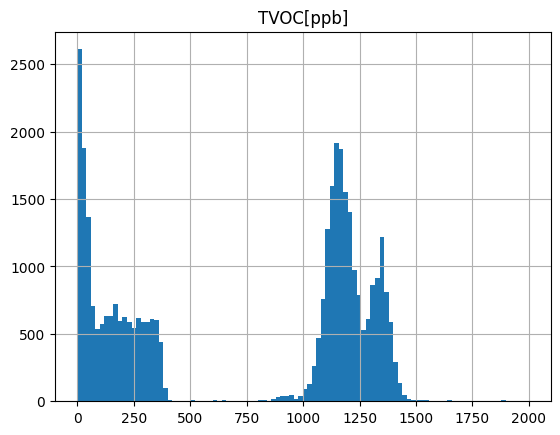

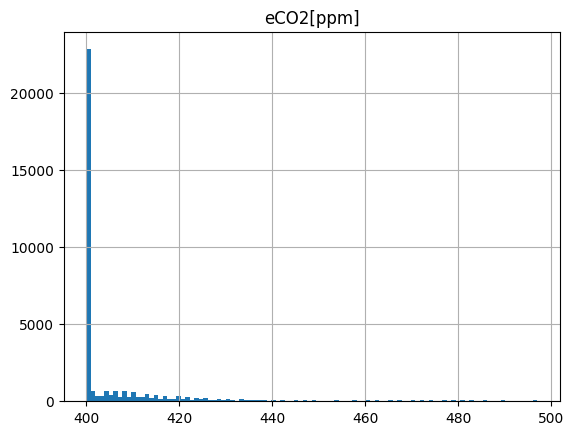

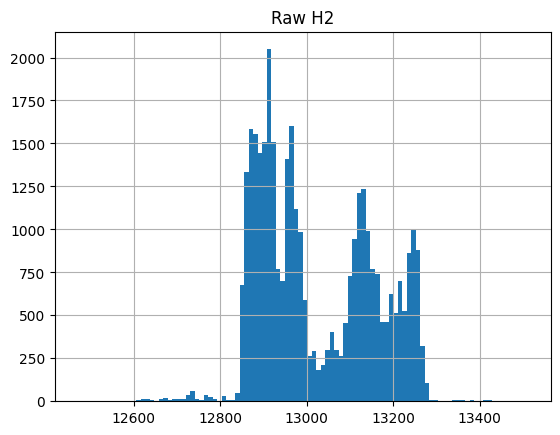

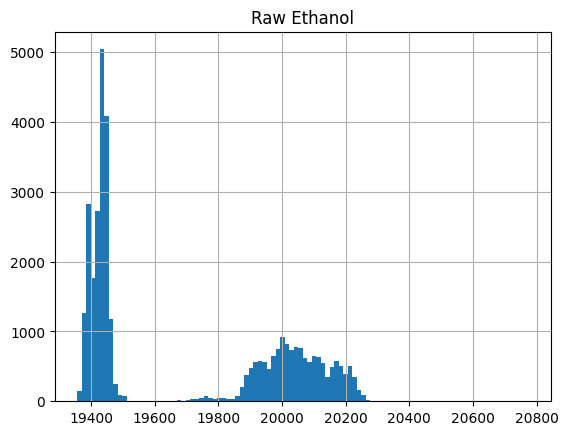

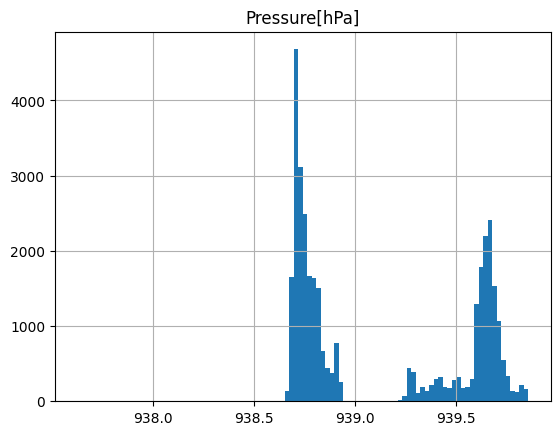

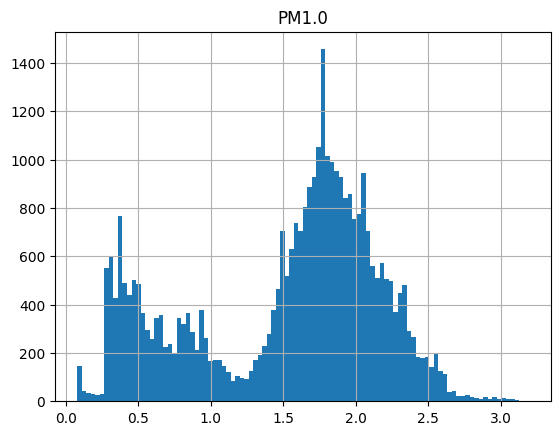

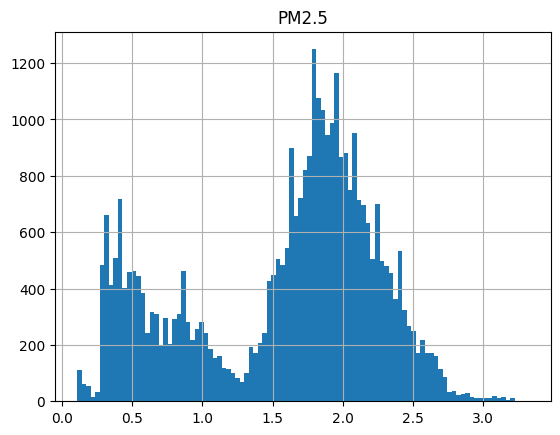

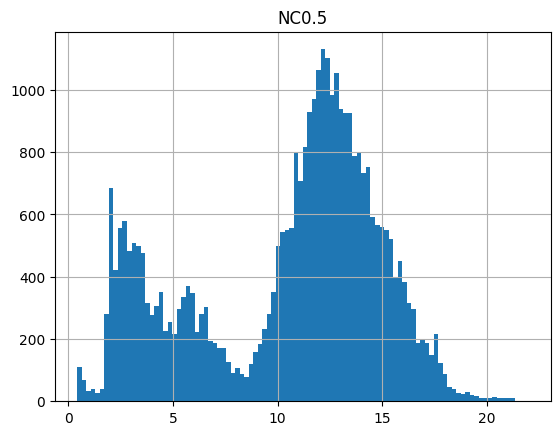

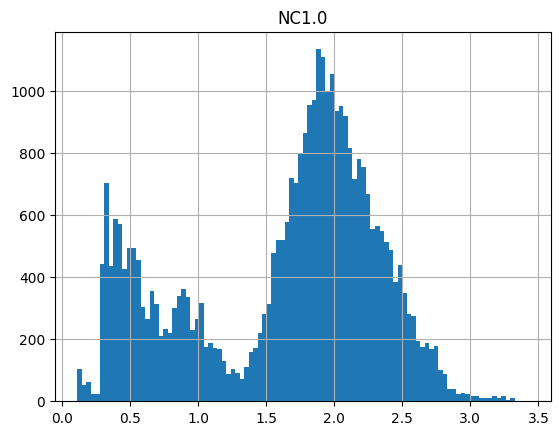

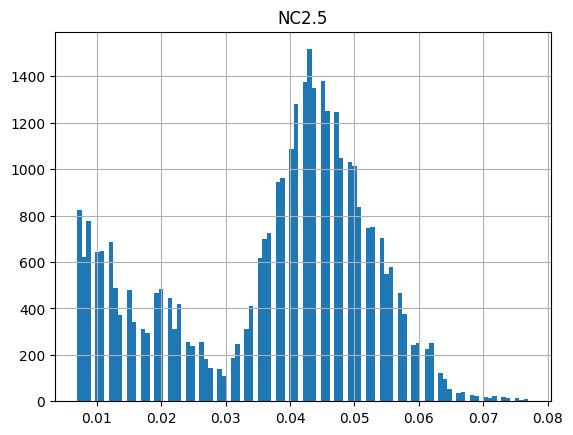

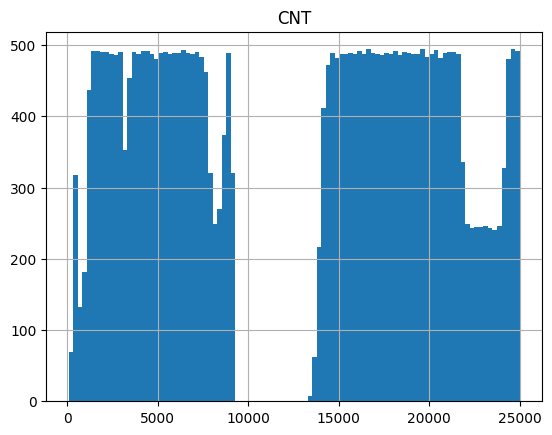

In [146]:
filtered_outlier = data_filtered[['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'CNT']]

for col in filtered_outlier:
    data_filtered.hist(col, bins=100)

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  float64
 5   eCO2[ppm]       62630 non-null  float64
 6   Raw H2          62630 non-null  float64
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  object 
dtypes: float64(11), int64(4), object(1)
memory usage: 7.6+ MB


In [148]:
data_filtered.loc[(data_filtered['Fire Alarm'] == "Yes"), 'Fire Alarm'] = 1
data_filtered.loc[(data_filtered['Fire Alarm'] == "No"), 'Fire Alarm'] = 0
data_filtered['Fire Alarm'] = data_filtered['Fire Alarm'].astype(int)

C:\Users\liza5\AppData\Local\Temp\ipykernel_23236\1057792465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Fire Alarm'] = data_filtered['Fire Alarm'].astype(int)


D:\ForUniversity\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\ForUniversity\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


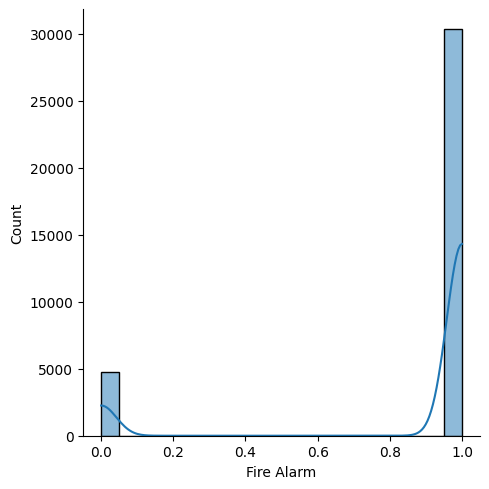

In [149]:
sns.displot(data_filtered["Fire Alarm"],bins=20,kde=True);

Маштабируем числовые признаки.

In [150]:
scaler = StandardScaler()
data_scaler = scaler.fit_transform(data_filtered.drop(["Fire Alarm"], axis=1))

In [151]:
Y = data_filtered["Fire Alarm"]
X = data_scaler
Y

240      0
247      0
248      0
249      0
250      0
        ..
49987    1
51223    0
51224    0
51227    0
51229    0
Name: Fire Alarm, Length: 35084, dtype: int32

In [152]:
X

array([[-1.69762331, -1.65785846,  0.62937791, ..., -2.12029306,
         1.20541606, -1.63548529],
       [-1.69716189, -1.65743416,  0.63605215, ..., -2.07301199,
         2.36593567, -1.63456624],
       [-1.69709597, -1.65737354,  0.63703104, ..., -2.07301199,
         2.23698905, -1.63443495],
       ...,
       [ 1.66308404, -2.9490776 ,  0.96344616, ...,  1.00742099,
         1.01199613, -1.65622946],
       [ 1.66328179, -2.94889575,  1.15032505, ...,  0.96587096,
         0.94752282, -1.65583559],
       [ 1.66341362, -2.94877452,  1.17257254, ...,  1.02318134,
         1.01199613, -1.655573  ]])

Балансировка классов.

In [153]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [154]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, k_neighbors=5)
X_res, y_res = sm.fit_resample(X, Y)

In [155]:
X_train, X_test, Y_train, Y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=42)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((40619, 15), (40619,), (20007, 15), (20007,))

Реализация knn.

In [156]:
def most_common(lst):
    return max(set(lst), key=lst.count)

In [157]:
def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

In [158]:
class KNeighborsClassifier_my():
    def __init__(self, k=10, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))
        
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

In [159]:
accuracies = []
knn1 = KNeighborsClassifier_my(k=10)
knn1.fit(X_train, Y_train)
accuracy = knn1.evaluate(X_test, Y_test)
accuracies.append(accuracy)

KeyboardInterrupt: 

Knn.

In [160]:
knn = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2) 
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [162]:
y_bin_knn_pred = knn.predict(X_test)
y_bin_knn_pred

array([1, 0, 1, ..., 1, 0, 0])

In [163]:
confusion_matrix(Y_test, y_bin_knn_pred)

array([[ 9991,     7],
       [    3, 10006]], dtype=int64)

In [164]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_bin_knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9998
           1       1.00      1.00      1.00     10009

    accuracy                           1.00     20007
   macro avg       1.00      1.00      1.00     20007
weighted avg       1.00      1.00      1.00     20007



In [165]:
from collections import Counter
Counter(Y_test)

Counter({1: 10009, 0: 9998})

Реализация метрик.

In [166]:
def accuracy_score(Y_test, y_bin_knn_pred):
    arr=confusion_matrix(Y_test, y_bin_knn_pred)
    TP=arr[0,0]
    FP=arr[0,1]
    FN=arr[1,0]
    TN=arr[1,1]
    return((TP+TN)/(TP+TN+FP+FN))

In [167]:
def precision_score(Y_test, y_bin_knn_pred):
    arr=confusion_matrix(Y_test, y_bin_knn_pred)
    TP=arr[0,0]
    FP=arr[0,1]
    return(TP/(TP+FP))

In [168]:
def recall_score(Y_test, y_bin_knn_pred):
    arr=confusion_matrix(Y_test, y_bin_knn_pred)
    TP=arr[0,0]
    FN=arr[1,0]
    return(TP/(TP+FN))

In [169]:
def f1_score(Y_test, y_bin_knn_pred):
    multy=precision_score(Y_test, y_bin_knn_pred)*recall_score(Y_test, y_bin_knn_pred)
    sum=precision_score(Y_test, y_bin_knn_pred)+recall_score(Y_test, y_bin_knn_pred)
    return( 2*(multy/sum) )

In [170]:
accuracy_score(Y_test, y_bin_knn_pred)

0.9995001749387714

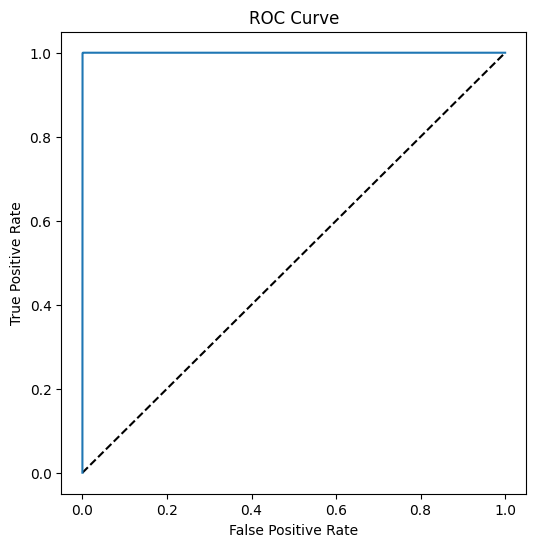

In [171]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
%matplotlib inline

y_scores = knn.predict_proba(X_test)
# Вычислить ROC кривую
fpr, tpr, thresholds = roc_curve(Y_test, y_scores[:,1])

# Построить ROC кривую
fig = plt.figure(figsize=(6, 6))
# Постройте диагональную линию 50%
plt.plot([0, 1], [0, 1], 'k--')
# Построить FPR and TPR, которые достигаются нашей моделью
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [172]:
auc = roc_auc_score(Y_test,y_scores[:,1])
print(auc)

0.9998492305115034


In [173]:
rec = recall_score(Y_test,y_bin_knn_pred)
print(rec)

0.9996998198919351


In [174]:
prec = precision_score(Y_test,y_bin_knn_pred)
print(prec)

0.9992998599719944


In [175]:
print(f1_score(Y_test, y_bin_knn_pred))

0.999499799919968


In [176]:
ridge = Ridge(alpha=0.5).fit(X_train, Y_train)

In [177]:
parameters = {'alpha': np.arange(0, 1, 0.1)}
ridge_optimal = GridSearchCV(Ridge(), parameters).fit(X_train, Y_train)
ridge_optimal.best_params_

{'alpha': 0.30000000000000004}

Наивный базис

In [178]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred_NB = gnb.predict(X_test)
print(classification_report(Y_test, Y_pred_NB))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      9998
           1       0.99      0.96      0.98     10009

    accuracy                           0.98     20007
   macro avg       0.98      0.98      0.98     20007
weighted avg       0.98      0.98      0.98     20007



In [179]:
accuracy_score(Y_test, Y_pred_NB)

0.9768580996651172

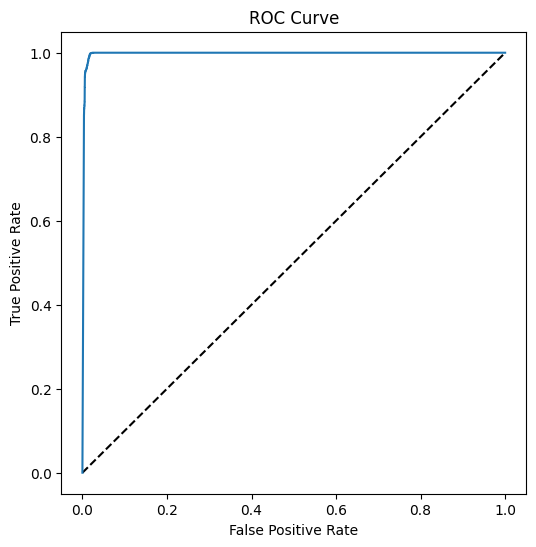

In [180]:
%matplotlib inline

y_scores = gnb.predict_proba(X_test)
# Вычислить ROC кривую
fpr, tpr, thresholds = roc_curve(Y_test, y_scores[:,1])

# Построить ROC кривую
fig = plt.figure(figsize=(6, 6))
# Постройте диагональную линию 50%
plt.plot([0, 1], [0, 1], 'k--')
# Построить FPR and TPR, которые достигаются нашей моделью
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [181]:
auc = roc_auc_score(Y_test,y_scores[:,1])
print(auc)

0.9973649890333746


In [182]:
rec = recall_score(Y_test,Y_pred_NB)
print(rec)

0.9646233310593509


In [183]:
prec = precision_score(Y_test,Y_pred_NB)
print(prec)

0.98999799959992


In [184]:
print(f1_score(Y_test, Y_pred_NB))

0.9771459598203267


Логистическая регрессия.

In [185]:
from sklearn.linear_model import LogisticRegression


log = LogisticRegression(random_state=42).fit(X_train, Y_train)
Y_pred_log = log.predict(X_test)
log.score(X_train, Y_train)
print(classification_report(Y_test, Y_pred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9998
           1       1.00      1.00      1.00     10009

    accuracy                           1.00     20007
   macro avg       1.00      1.00      1.00     20007
weighted avg       1.00      1.00      1.00     20007



In [186]:
accuracy_score(Y_test, Y_pred_log)

0.9991003148897886

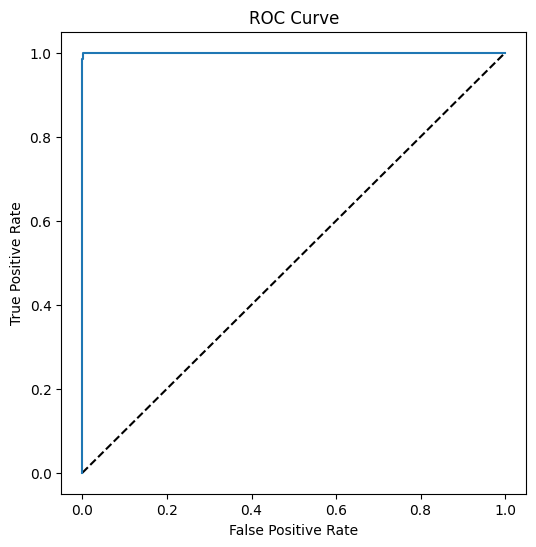

In [187]:
%matplotlib inline

y_scores = log.predict_proba(X_test)
# Вычислить ROC кривую
fpr, tpr, thresholds = roc_curve(Y_test, y_scores[:,1])

# Построить ROC кривую
fig = plt.figure(figsize=(6, 6))
# Постройте диагональную линию 50%
plt.plot([0, 1], [0, 1], 'k--')
# Построить FPR and TPR, которые достигаются нашей моделью
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [188]:
auc = roc_auc_score(Y_test,y_scores[:,1])
print(auc)

0.9999874587765989


In [189]:
rec = recall_score(Y_test,Y_pred_log)
print(rec)

1.0


In [190]:
prec = precision_score(Y_test,Y_pred_log)
print(prec)

0.9981996399279855


In [191]:
print(f1_score(Y_test, Y_pred_log))

0.9990990089098007


SVM.

In [192]:
from sklearn import svm

clf = svm.SVC(probability=True)
clf.fit(X_train, Y_train)

Y_pred_sv = clf.predict(X_test)
print(classification_report(Y_test, Y_pred_sv))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9998
           1       1.00      1.00      1.00     10009

    accuracy                           1.00     20007
   macro avg       1.00      1.00      1.00     20007
weighted avg       1.00      1.00      1.00     20007



In [193]:
accuracy_score(Y_test, Y_pred_sv)

0.9990003498775428

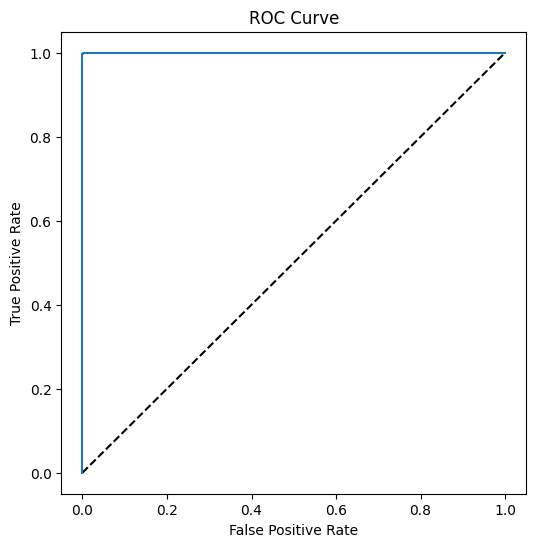

In [194]:
%matplotlib inline

y_scores = clf.predict_proba(X_test)
# Вычислить ROC кривую
fpr, tpr, thresholds = roc_curve(Y_test, y_scores[:,1])

# Построить ROC кривую
fig = plt.figure(figsize=(6, 6))
# Постройте диагональную линию 50%
plt.plot([0, 1], [0, 1], 'k--')
# Построить FPR and TPR, которые достигаются нашей моделью
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [195]:
auc = roc_auc_score(Y_test,y_scores[:,1])
print(auc)

0.9999958429092153


In [196]:
rec = recall_score(Y_test,Y_pred_sv)
print(rec)

1.0


In [197]:
prec = precision_score(Y_test,Y_pred_sv)
print(prec)

0.997999599919984


In [198]:
print(f1_score(Y_test, Y_pred_sv))

0.9989987985582699


Итоговая модель классификаторов.

In [199]:
classifiers = {
    'SVC': clf,
    'KNN classifier': knn,
    'Logistic Regression': log,
    'Gaussian NB': gnb,
}
list = [Y_pred_sv, y_bin_knn_pred, Y_pred_log, Y_pred_NB]

In [200]:
n_classifiers = len(classifiers)

for index, (name, classifier) in enumerate(classifiers.items()):
    accuracy = accuracy_score(Y_test, list[index])
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
    print(classification_report(Y_test,list[index]))

Accuracy (train) for SVC: 99.9% 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9998
           1       1.00      1.00      1.00     10009

    accuracy                           1.00     20007
   macro avg       1.00      1.00      1.00     20007
weighted avg       1.00      1.00      1.00     20007

Accuracy (train) for KNN classifier: 100.0% 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9998
           1       1.00      1.00      1.00     10009

    accuracy                           1.00     20007
   macro avg       1.00      1.00      1.00     20007
weighted avg       1.00      1.00      1.00     20007

Accuracy (train) for Logistic Regression: 99.9% 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9998
           1       1.00      1.00      1.00     10009

    accuracy                           1.00     20007
 